## Measure Filament Diameter

In [1]:
# RecycleBot

import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import seaborn as sns
from skimage import io, transform

%matplotlib inline
plt.ion()   # interactive mode

### 1. Get the image

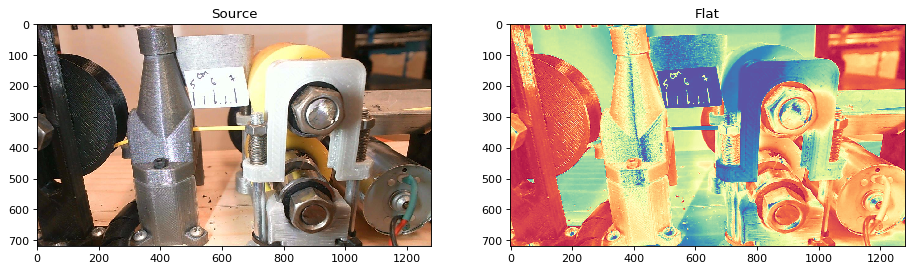

In [2]:
#img_src = mpimg.imread('pic.jpg')

img_bgr = cv2.imread("pic.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(14, 14), dpi=80)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Source')
plt.subplot(1, 2, 2)
plt.imshow(gray,cmap=plt.cm.Spectral, alpha=1)
plt.title('Flat')
plt.show()

### 2. Crop the Region of Interest

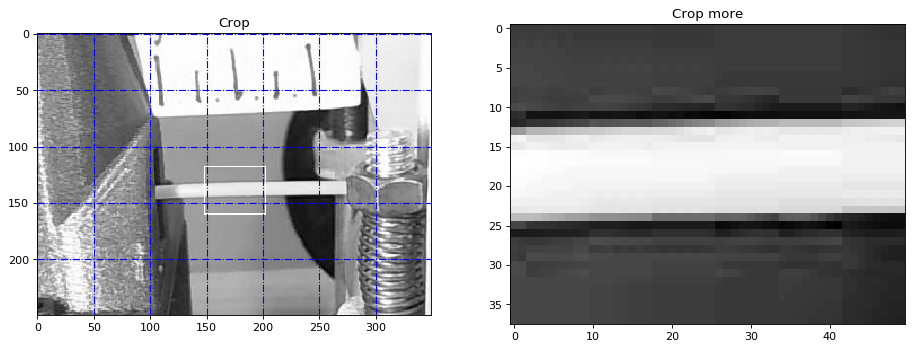

In [3]:
y = 200
x = 400
h = 250
w = 350

crop_img = gray[y:y+h, x:x+w]


crop_more = crop_img[120:158, 150:200]

#imgplot = plt.imshow(crop_img,cmap=plt.cm.gray)
cv2.rectangle(crop_img,(148,118),(202,160),(255,255,255),1)

fig = plt.figure(figsize=(14, 14), dpi=80)
plt.subplot(1, 2, 1)
plt.imshow(crop_img,cmap=plt.cm.gray)
plt.grid(color='b', linestyle='-.', linewidth=1)
plt.title('Crop')
plt.subplot(1, 2, 2)
plt.imshow(crop_more,cmap=plt.cm.gray)
plt.title('Crop more')
plt.show()

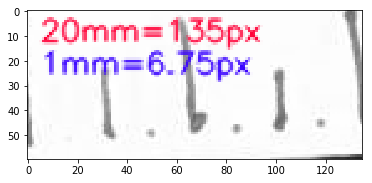

In [4]:
# Check the scale
crop_scale = crop_img[10:70, 110:245]
crop_scale = cv2.cvtColor(crop_scale, cv2.COLOR_GRAY2RGB)
cv2.putText(crop_scale,'20mm=135px',(5,12),cv2.FONT_HERSHEY_SIMPLEX,0.4,(255,0,55),1,cv2.LINE_AA)
cv2.putText(crop_scale,'1mm=6.75px',(5,25),cv2.FONT_HERSHEY_SIMPLEX,0.4,(55,0,255),1,cv2.LINE_AA)

imgplot = plt.imshow(crop_scale,cmap=plt.cm.gray)

mm2pix_scale = 135/20

In [5]:
135/20

6.75

### 3. Binarize ROI

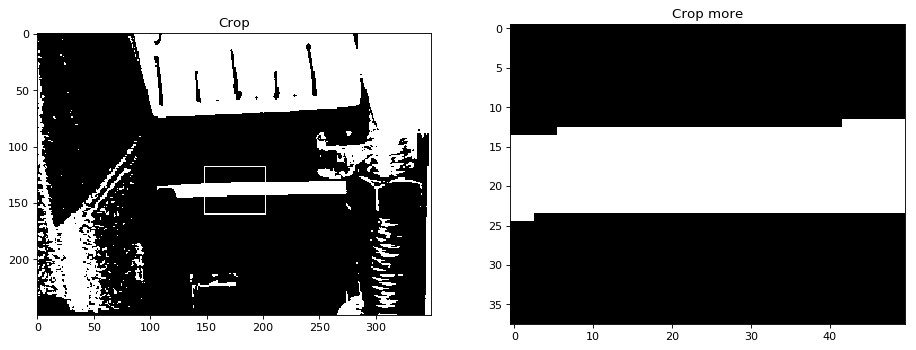

In [6]:

#retval_crop1, threshold_crop1 = cv2.threshold(crop_img, 210, 255, cv2.THRESH_BINARY)
retval_crop1, threshold_crop1 = cv2.threshold(crop_img, 210, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
retval_crop2, threshold_crop2 = cv2.threshold(crop_more, 210, 255, cv2.THRESH_BINARY)

#retval2,threshold2 = cv2.threshold(crop_more,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#imgplot = plt.imshow(threshold)


fig = plt.figure(figsize=(14, 14), dpi=80)
plt.subplot(1, 2, 1)
plt.imshow(threshold_crop1,cmap=plt.cm.gray)
plt.title('Crop')
plt.subplot(1, 2, 2)
plt.imshow(threshold_crop2,cmap=plt.cm.gray)
plt.title('Crop more')
plt.show()


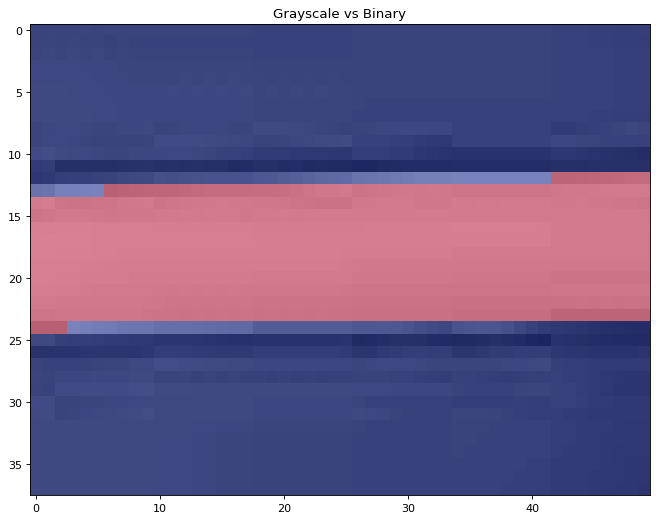

In [7]:
# Check matching
fig = plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(crop_more, cmap=plt.cm.gray, alpha=1)
plt.imshow(threshold_crop2, cmap=plt.cm.coolwarm, alpha=0.5)
plt.title('Grayscale vs Binary')
plt.show()

### 4. Slice a single_pixel array

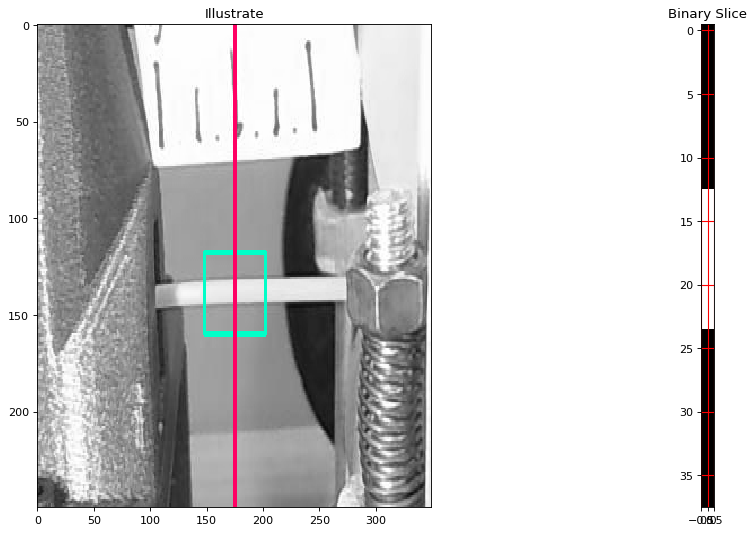

(38, 1)

In [8]:
illustrate = cv2.cvtColor(crop_img, cv2.COLOR_GRAY2RGB)
cv2.rectangle(illustrate,(148,118),(202,160),(0,255,200),2)
cv2.line(illustrate,(175,0),(175,250),(255,0,100),2)

bin_slice = threshold_crop2[:,20:21]

fig = plt.figure(figsize=(14, 8), dpi=80)

plt.subplot(1, 2, 1)
plt.imshow(illustrate,aspect="auto")
plt.title('Illustrate')
plt.subplot(1, 2, 2)
plt.imshow(bin_slice,cmap=plt.cm.gray,aspect="equal")
plt.grid(color='r', linestyle='-', linewidth=1)
plt.title('Binary Slice')
plt.show()

bin_slice.shape

### 5. Calculate Filament Diameter

In [9]:
#bin_slice

px_d = np.count_nonzero(bin_slice) # number of nonzero elements
px_d # number of white pixel in the cross section

# add 1 pixel as a calibration coeffitient
px_d = px_d + 1

mm_d = px_d/mm2pix_scale # calculate diameter in mm, based on our pixel/mm ration
mm_d # calculated diameter of filament

print(mm_d)
print('filament diameter is {} mm'.format(np.round(mm_d,3)))

1.7777777777777777
filament diameter is 1.778 mm


### 6. Calculate Diameter Distribution

In [10]:
Darray = np.zeros(100)
#Darray

In [11]:
for i in range(len(Darray)):
    Darray[i] = np.random.normal(1.75,0.25)
    
#Darray

In [12]:
len(Darray)

100

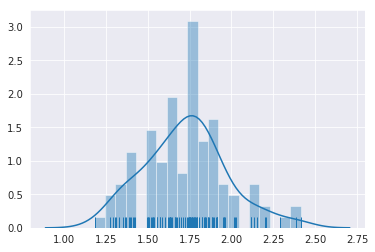

In [13]:
# histogram with seaborn

sns.set_style('darkgrid')
sns.distplot(Darray, bins=20, hist=True, kde=True, rug=True)

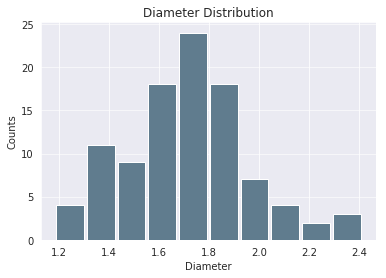

In [14]:
# histogram with pandas

size, scale = 1000, 10
commutes = pd.Series(Darray)

commutes.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Diameter Distribution')
plt.xlabel('Diameter')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()
